In [1]:
import pandas as pd
import spacy 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
import os; print(os.getcwd())

C:\Users\91981\Sentiment Analysis


In [3]:
df = pd.read_csv('C:/Users/91981/Sentiment Analysis/twitter_training.csv')

In [4]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
df.drop( columns = ['2401'], inplace = True)

In [6]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.columns

Index(['Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')

In [8]:
df.rename(columns = {'Borderlands' : 'Game_Name', 'Positive' : 'Sentiment', 'im getting on borderlands and i will murder you all ,' : 'tweet'}, inplace=True)

In [9]:
df.columns

Index(['Game_Name', 'Sentiment', 'tweet'], dtype='object')

In [10]:
df.isna().sum()
df.shape
df =  df.dropna()
df.shape

(73995, 3)

In [11]:
df.Sentiment.value_counts()

Sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [12]:
df_positive=df[df.Sentiment == 'Positive'].iloc[:2000]
df_negative=df[df.Sentiment == 'Negative'].iloc[:2000]
df_neutral=df[df.Sentiment == 'Neutral'].iloc[:2000]
df_irrelevant=df[df.Sentiment == 'Irrelevant'].iloc[:2000]
df2 = pd.concat([df_positive,df_negative,df_neutral,df_irrelevant])
df2.Sentiment.value_counts()

Sentiment
Positive      2000
Negative      2000
Neutral       2000
Irrelevant    2000
Name: count, dtype: int64

In [13]:
df2 = pd.concat([df_positive,df_negative,df_neutral,df_irrelevant], axis=0)

In [14]:
df2.Sentiment.value_counts()

Sentiment
Positive      2000
Negative      2000
Neutral       2000
Irrelevant    2000
Name: count, dtype: int64

In [15]:
df2.head(10)

,Game_Name,Sentiment,tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...
5,Borderlands,Positive,So I spent a few hours making something for fu...
6,Borderlands,Positive,So I spent a couple of hours doing something f...
7,Borderlands,Positive,So I spent a few hours doing something for fun...
8,Borderlands,Positive,So I spent a few hours making something for fu...
9,Borderlands,Positive,2010 So I spent a few hours making something f...


In [16]:
df2.Game_Name.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)'], dtype=object)

In [17]:
game_df=(pd.get_dummies(df2['Game_Name'])).astype('int')

In [18]:
game_df

,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
10628,0,0,0,0,1
10629,0,0,0,0,1
10630,0,0,0,0,1
10631,0,0,0,0,1


In [19]:
df2.columns


Index(['Game_Name', 'Sentiment', 'tweet'], dtype='object')

In [20]:
game_df.shape

(8000, 5)

In [21]:
nlp = spacy.load('en_core_web_sm')

In [22]:
def lemmatization(text): #lemmatization function is used to convert string to their actual meaning
    doc = nlp(text) #input text is loaded in the library
    lemmaList = [word.lemma_ for word in doc] #iterates through each word in the spacy document,it extract through lemma and add it in lemma list
    return '' .join(lemmaList) #joins all the lemmas in the lemmaList into a single string using the .join method and an empty string ('') as the separator.

In [23]:
df2['lemma'] = df2['tweet'].apply(lemmatization)

In [24]:
print(df2.head(10))

     Game_Name Sentiment                                              tweet  \
0  Borderlands  Positive  I am coming to the borders and I will kill you...   
1  Borderlands  Positive  im getting on borderlands and i will kill you ...   
2  Borderlands  Positive  im coming on borderlands and i will murder you...   
3  Borderlands  Positive  im getting on borderlands 2 and i will murder ...   
4  Borderlands  Positive  im getting into borderlands and i can murder y...   
5  Borderlands  Positive  So I spent a few hours making something for fu...   
6  Borderlands  Positive  So I spent a couple of hours doing something f...   
7  Borderlands  Positive  So I spent a few hours doing something for fun...   
8  Borderlands  Positive  So I spent a few hours making something for fu...   
9  Borderlands  Positive  2010 So I spent a few hours making something f...   

                                               lemma  
0              IbecometotheborderandIwillkillyouall,  
1               Imge

In [25]:
def remove_stopwords(text):
    doc = nlp(text)
    no_stopwords = [word.text for word in doc if not word.is_stop and not word.is_punct]
    return ''.join(no_stopwords)

In [26]:
df2['final'] = df2['lemma'].apply(remove_stopwords)

In [27]:
df2.head(10)

,Game_Name,Sentiment,tweet,lemma,final
0,Borderlands,Positive,I am coming to the borders and I will kill you...,"IbecometotheborderandIwillkillyouall,",IbecometotheborderandIwillkillyouall
1,Borderlands,Positive,im getting on borderlands and i will kill you ...,"ImgetonborderlandandIwillkillyouall,",ImgetonborderlandandIwillkillyouall
2,Borderlands,Positive,im coming on borderlands and i will murder you...,"ImcomeonborderlandandIwillmurderyouall,",ImcomeonborderlandandIwillmurderyouall
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"Imgetonborderland2andIwillmurderyouIall,",Imgetonborderland2andIwillmurderyouIall
4,Borderlands,Positive,im getting into borderlands and i can murder y...,"ImgetintoborderlandandIcanmurderyouall,",ImgetintoborderlandandIcanmurderyouall
5,Borderlands,Positive,So I spent a few hours making something for fu...,soIspendafewhourmakesomethingforfun...ifyoudon...,soIspendafewhourmakesomethingforfunifyoudonotk...
6,Borderlands,Positive,So I spent a couple of hours doing something f...,soIspendacoupleofhourdosomethingforfun...ifyou...,soIspendacoupleofhourdosomethingforfunifyoudon...
7,Borderlands,Positive,So I spent a few hours doing something for fun...,soIspendafewhourdosomethingforfun...ifyoudonot...,soIspendafewhourdosomethingforfunifyoudonotkno...
8,Borderlands,Positive,So I spent a few hours making something for fu...,soIspendafewhourmakesomethingforfun...ifyoudon...,soIspendafewhourmakesomethingforfunifyoudonotk...
9,Borderlands,Positive,2010 So I spent a few hours making something f...,2010soIspendafewhourmakesomethingforfun...ifyo...,2010soIspendafewhourmakesomethingforfunifyoudo...


In [28]:
df2.drop(columns = ['tweet','lemma'],inplace=True)

In [29]:
df2.head(10)

,Game_Name,Sentiment,final
0,Borderlands,Positive,IbecometotheborderandIwillkillyouall
1,Borderlands,Positive,ImgetonborderlandandIwillkillyouall
2,Borderlands,Positive,ImcomeonborderlandandIwillmurderyouall
3,Borderlands,Positive,Imgetonborderland2andIwillmurderyouIall
4,Borderlands,Positive,ImgetintoborderlandandIcanmurderyouall
5,Borderlands,Positive,soIspendafewhourmakesomethingforfunifyoudonotk...
6,Borderlands,Positive,soIspendacoupleofhourdosomethingforfunifyoudon...
7,Borderlands,Positive,soIspendafewhourdosomethingforfunifyoudonotkno...
8,Borderlands,Positive,soIspendafewhourmakesomethingforfunifyoudonotk...
9,Borderlands,Positive,2010soIspendafewhourmakesomethingforfunifyoudo...


In [30]:
sentiment_df = pd.concat([df2, game_df], axis=1)

In [31]:
sentiment_df.head(10)

,Game_Name,Sentiment,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Borderlands,Positive,IbecometotheborderandIwillkillyouall,0,1,0,0,0
1,Borderlands,Positive,ImgetonborderlandandIwillkillyouall,0,1,0,0,0
2,Borderlands,Positive,ImcomeonborderlandandIwillmurderyouall,0,1,0,0,0
3,Borderlands,Positive,Imgetonborderland2andIwillmurderyouIall,0,1,0,0,0
4,Borderlands,Positive,ImgetintoborderlandandIcanmurderyouall,0,1,0,0,0
5,Borderlands,Positive,soIspendafewhourmakesomethingforfunifyoudonotk...,0,1,0,0,0
6,Borderlands,Positive,soIspendacoupleofhourdosomethingforfunifyoudon...,0,1,0,0,0
7,Borderlands,Positive,soIspendafewhourdosomethingforfunifyoudonotkno...,0,1,0,0,0
8,Borderlands,Positive,soIspendafewhourmakesomethingforfunifyoudonotk...,0,1,0,0,0
9,Borderlands,Positive,2010soIspendafewhourmakesomethingforfunifyoudo...,0,1,0,0,0


In [32]:
df2.shape

(8000, 3)

In [33]:
df2.isna().sum()

Game_Name    0
Sentiment    0
final        0
dtype: int64

In [34]:
#DIVIDING THE DATASET

In [35]:
X = sentiment_df.drop(columns = ['Sentiment'])
y =  sentiment_df['Sentiment']

In [36]:
X.head()

,Game_Name,final,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries)
0,Borderlands,IbecometotheborderandIwillkillyouall,0,1,0,0,0
1,Borderlands,ImgetonborderlandandIwillkillyouall,0,1,0,0,0
2,Borderlands,ImcomeonborderlandandIwillmurderyouall,0,1,0,0,0
3,Borderlands,Imgetonborderland2andIwillmurderyouIall,0,1,0,0,0
4,Borderlands,ImgetintoborderlandandIcanmurderyouall,0,1,0,0,0


In [37]:
#TFIDVECTORIZER

In [38]:
tfidf = TfidfVectorizer()

In [39]:
tfidf.fit(X['final'])

TfidfVectorizer()

In [40]:
tfidf_matrix = tfidf.transform(X['final']).toarray()

In [41]:
tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
vectorizer_df = pd.DataFrame(tfidf_matrix, columns = tfidf.get_feature_names_out())

In [43]:
vectorizer_df.head()

,00,000,0003,000amazonpaycashbackgetournewoneplustvreadmoreatourswideweb,000amazonpaycashbackwithanewoneplustvreadmoreatourswideweb,000amazonpaycashbackwithbuyanewyorkoneplusfortvreadmorereviewatourswideweb,000frompcqc,000goldenkamuyunithttps,000grantfromfqc,000grantfrompcqc,...,zssometrulyseriousproblemfitintobothstoryandgameplaydrop,zxxxvi,zxxxvids,втретьарце,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,с4июля,اللعبه2,خلاصحبيتbinاللعبه2,خلاصحبيتاللعبه
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
X.drop(columns = ['final'], inplace = True)

In [45]:
X.shape, vectorizer_df.shape

((8000, 6), (8000, 13665))

In [46]:
X = pd.concat([X, vectorizer_df], axis = 1)

In [47]:
X.head()

,Game_Name,Amazon,Borderlands,CallOfDutyBlackopsColdWar,Overwatch,Xbox(Xseries),00,000,0003,000amazonpaycashbackgetournewoneplustvreadmoreatourswideweb,...,zssometrulyseriousproblemfitintobothstoryandgameplaydrop,zxxxvi,zxxxvids,втретьарце,ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее,есть,с4июля,اللعبه2,خلاصحبيتbinاللعبه2,خلاصحبيتاللعبه
0,Borderlands,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Borderlands,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Borderlands,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Borderlands,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Borderlands,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
X.isna().sum()

Game_Name                    952
Amazon                       952
Borderlands                  952
CallOfDutyBlackopsColdWar    952
Overwatch                    952
                            ... 
есть                         952
с4июля                       952
اللعبه2                      952
خلاصحبيتbinاللعبه2           952
خلاصحبيتاللعبه               952
Length: 13671, dtype: int64

In [49]:
X = X.fillna(0)
X.isna().sum()

Game_Name                    0
Amazon                       0
Borderlands                  0
CallOfDutyBlackopsColdWar    0
Overwatch                    0
                            ..
есть                         0
с4июля                       0
اللعبه2                      0
خلاصحبيتbinاللعبه2           0
خلاصحبيتاللعبه               0
Length: 13671, dtype: int64

In [50]:
#TRAIN TEST SPLIT

In [51]:
X.shape, y.shape

((8952, 13671), (8000,))

In [52]:
X =X.iloc[:8000]

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state =42)

In [54]:
X_train.shape, X_test.shape

((6400, 13671), (1600, 13671))

In [55]:
#BUILDING MODEL

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [57]:
print(X_train.columns)

Index(['Game_Name', 'Amazon', 'Borderlands', 'CallOfDutyBlackopsColdWar',
       'Overwatch', 'Xbox(Xseries)', '00', '000', '0003',
       '000amazonpaycashbackgetournewoneplustvreadmoreatourswideweb',
       ...
       'zssometrulyseriousproblemfitintobothstoryandgameplaydrop', 'zxxxvi',
       'zxxxvids', 'втретьарце',
       'ееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееееее',
       'есть', 'с4июля', 'اللعبه2', 'خلاصحبيتbinاللعبه2', 'خلاصحبيتاللعبه'],
      dtype='object', length=13671)


In [62]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Example DataFrame
data = pd.DataFrame({
    'Game': ['CallOfDutyBlackopsColdWar', 'FIFA21', 'Cyberpunk2077'],
    'Score': [8.5, 9.0, 7.5],
    'ReleaseYear': [2020, 2020, 2020],
    'Publisher': ['Activision', 'EA Sports', 'CD Projekt']
})

# Features and target
X = data[['Game', 'ReleaseYear', 'Publisher']]
y = data['Score']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Game', 'Publisher'])
    ],
    remainder='passthrough'
)

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),
    ('model', RandomForestRegressor(n_jobs=1, random_state=42, n_estimators=200))
])

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
predictions = pipeline.predict(X_test)

# Print predictions
print(predictions)


[8.355]


In [66]:
predictions = pipeline.predict(X_test)

In [67]:
y_test[:5]

0    8.5
Name: Score, dtype: float64

In [68]:
predictions[:5]

array([8.355])

In [70]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions with the pipeline
predictions = pipeline.predict(X_test)

# Calculate and print regression metrics
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.021024999999999877
Mean Absolute Error: 0.14499999999999957
R^2 Score: nan


C:\Users\91981\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [73]:
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R^2): {r2:.4f}")

Mean Squared Error (MSE): 0.0210
Mean Absolute Error (MAE): 0.1450
R-squared (R^2): nan


In [75]:
report = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse, mae, r2]
})
print(report)

                Metric     Value
0   Mean Squared Error  0.021025
1  Mean Absolute Error  0.145000
2            R-squared       NaN


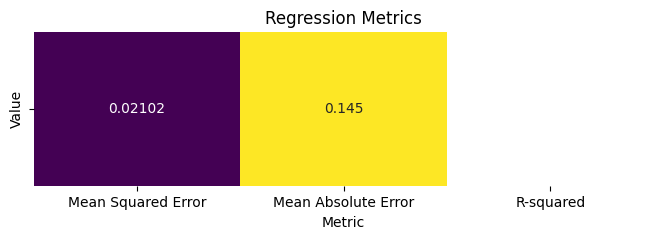

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame to display the metrics
report = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Mean Absolute Error', 'R-squared'],
    'Value': [mse, mae, r2]
})

# Set the index to the Metric column for better display
report.set_index('Metric', inplace=True)

# Create a heatmap
plt.figure(figsize=(8, 2))
sns.heatmap(report.T, annot=True, fmt=".4g", cmap="viridis", cbar=False)
plt.title('Regression Metrics')
plt.show()
